##**Project - Image Classification with Transfer Learning in TensorFlow**

A custom image classifier using transfer learning, leveraging TensorFlow and pre-trained models

In [ ]:
pip install tensorflow tensorflow-hub matplotlib

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os

#load dataset

In [ ]:
batch_size = 32
img_size = (224,224)

In [ ]:
dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [ ]:
download_path = tf.keras.utils.get_file(
    fname="flower_photos",
    origin=dataset,
    untar=True,
    cache_dir='./'
)
data_dir = os.path.join(os.path.dirname(download_path), 'flower_photos')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split = 0.2, subset = "training", seed = 123,
    image_size = img_size, batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = img_size,
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Visualizing Data

In [ ]:
class_names = train_dataset.class_names

In [ ]:
plt.figure(figsize = (10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

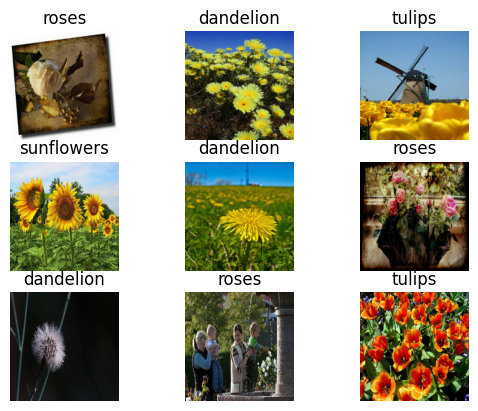

In [ ]:
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

Loading Pretrained Model - MobileNetV2

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape = (224,224,3),
    include_top = False,
    weights = 'imagenet'
)
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Adding Classification Head

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(class_names), activation = 'softmax')

model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 230ms/step - accuracy: 0.3247 - loss: 1.5517 - val_accuracy: 0.5041 - val_loss: 1.2813
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.5696 - loss: 1.1754 - val_accuracy: 0.5436 - val_loss: 1.1862
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.6203 - loss: 1.0487 - val_accuracy: 0.5640 - val_loss: 1.1305
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.6476 - loss: 0.9864 - val_accuracy: 0.5872 - val_loss: 1.0796
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.6646 - loss: 0.9317 - val_accuracy: 0.5777 - val_loss: 1.0791
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.6838 - loss: 0.9046 - val_accuracy: 0.5872 - val_loss: 1.0577
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.6953 - loss: 0.8625 - val_accuracy: 0.6022 - val_loss: 1.0375
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.7049 - loss: 0.8301 - val_accuracy: 0.60

Model Evaluation

In [ ]:
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy : {val_accuracy:.2f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5620 - loss: 1.0769
Validation Accuracy : 0.58


Fine tuning

In [ ]:
base_model.trainable = True

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
fine_tuning_history = model.fit(train_dataset, validation_data=val_dataset, epochs = 5)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 400ms/step - accuracy: 0.7083 - loss: 1.1243 - val_accuracy: 0.6308 - val_loss: 1.9250
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 119ms/step - accuracy: 0.9686 - loss: 0.1096 - val_accuracy: 0.6880 - val_loss: 1.6661
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.9879 - loss: 0.0432 - val_accuracy: 0.7357 - val_loss: 1.2582
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.9934 - loss: 0.0250 - val_accuracy: 0.7711 - val_loss: 1.1403
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 0.9992 - loss: 0.0110 - val_accuracy: 0.8270 - val_loss: 0.7908


In [ ]:
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy : {val_accuracy:.2f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8209 - loss: 0.7844
Validation Accuracy : 0.83
